### Problem Statement

The attached data is relates to an attrition problem of a company. Study the data very carefully. The variables are self explanatory. Start by identiyfing the variable types of the variables. This will help you to understand the kind of data exploration techniques you must use.

Each row in the dataset represent an employee. Every employee corresponds to a value of the variable "Attrition". A value of attirion = 1 indicte that the employee has left the company. In the same way, attirion = 0 would indicate that the employee has left the company. 

Your task will be to find 5 most important factors which you feel affects attiion.

### Data Dictionary

| Variables                      	| Type                       	| Description                                                                                     	|
|--------------------------------	|----------------------------	|-------------------------------------------------------------------------------------------------	|
|     Age                        	|     Numeric Discrete     	|     Age of the Employees varies between 18-60 years                                             	|
|     Attrition                  	|     Categorical Binary     	|     Whether the Employee has resigned from his position ? (Y/N)                                 	|
|     BusinessTravel             	|     Categorical Nominal    	|     How often does the Employee is sent on Business Travel? (Rarely/   Frequently/No Travel)    	|
|     Department                 	|     Categorical Nominal    	|     Department which the employee belongs to (Sales / R&D / HR)                                 	|
|     EducationField             	|     Categorical Nominal    	|     Field of Education (Life Science/Medical/Marketing/Technical   Degree/HR)                   	|
|     EnvironmentSatisfaction    	|     Categorical Ordinal    	|     Employee Rating of the Work Environment (Scale of 1 to 4)                                   	|
|     Gender                     	|     Categorical Nominal    	|     Male/Female                                                                                 	|
|     JobInvolvement             	|     Categorical Ordinal    	|     Employee Rating of the Work Environment (Scale of 1 to 4)                                   	|
|     JobLevel                   	|     Categorical Ordinal    	|     Position of the employee in the Business Vertical ( 1 to 5 where 5   is Senior Position)    	|
|     JobSatisfaction            	|     Categorical Ordinal    	|     Employee Rating of their Job Satisfaction (Scale of 1 to 4)                                 	|
|     MaritalStatus              	|     Categorical Nominal    	|     Single / Married / Divorced                                                                 	|
|     MonthlyIncome              	|     Numeric Continuous     	|     Monthly Income received by the employees                                                    	|
|     OverTime                   	|     Categorical Binary     	|     Whether the Employee was asked to work Overtime ? (Y/N)                                     	|
|     TotalWorkingYears          	|     Numeric Discrete       	|     Total Work Experience of the Employee varies between 0-40 years                             	|
|     WorkLifeBalance            	|     Categorical Ordinal    	|     Employee Rating of Work Life Balance (Scale of 1 to 4)                                      	|
|     YearsAtCompany             	|     Numeric Discrete       	|     Total time spent by the employee in the company varies between   0-40 years                 	|
|     YearsInCurrentRole         	|     Numeric Discrete       	|     Number of years spent in Current Role varies between 0-18 years                             	|
|     YearsSinceLastPromotion    	|     Numeric Discrete       	|     Number of years since the Employee recieved a Promotion varies   between 0 - 15             	|
|     YearsWithCurrManager       	|     Numeric Discrete       	|     Number of years under the Current Manager varies between 0-17   years                       	|
|     DistanceFromHome           	|     Numeric Continous      	|     Distance from Home to Work in kms varies between 1- 29km                                    	|

### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

sns.set_palette("Set3",9)

### Import Datasets

In [4]:
os.chdir(r'C:\Anirudha\Projects\Praxis\IML\Attrition Dataset')
data = pd.read_csv('attrition.csv')
data.head()

# Segregate Categorical and Numerical Variables

cat_vars = ['BusinessTravel','Department','EducationField','Gender','MaritalStatus','OverTime',
            'EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','WorkLifeBalance']
num_vars = ['Age','MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole',
           'YearsSinceLastPromotion','YearsWithCurrManager','DistanceFromHome']

### Insights about the Company

Following insights were generated to better understand the company under analysis.

#### WorkForce Strength
- Current Workforce = 1233 
- Number of Employees who quit = 237 
- Attrition Rate = 16.12%

In [5]:
tot_employee = data
curr_employee = data[data["Attrition"] == 0]
quit_employee = data[data["Attrition"] == 1]

print("Current Workforce: ",len(curr_employee))
print("Employees who quit the company: ", len(quit_employee))
print("Attrition Rate : %.2f" % round(len(quit_employee)/len(tot_employee)*100,2))

Current Workforce:  1233
Employees who quit the company:  237
Attrition Rate : 16.12


#### Departments and Attrition
- 3 major departments in the company : HR , R&D and Sales 
- Majority of the employees work in R&D (67%) followed by Sales (29%) and HR (4%)
- Among the departments, Sales has the highest Attrition rate (20%) followed closely by HR (19%).
- Though majority employees work at R&D, the attrition rate for it is relatively low (14%) compared to the other two departments

Current Workforce in % (Department):
Human Resources : 4.14
Research & Development : 67.15
Sales : 28.71

Vacancies in each Department :
Human Resources : 12
Research & Development : 133
Sales : 92
Attrition                 0    1
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92


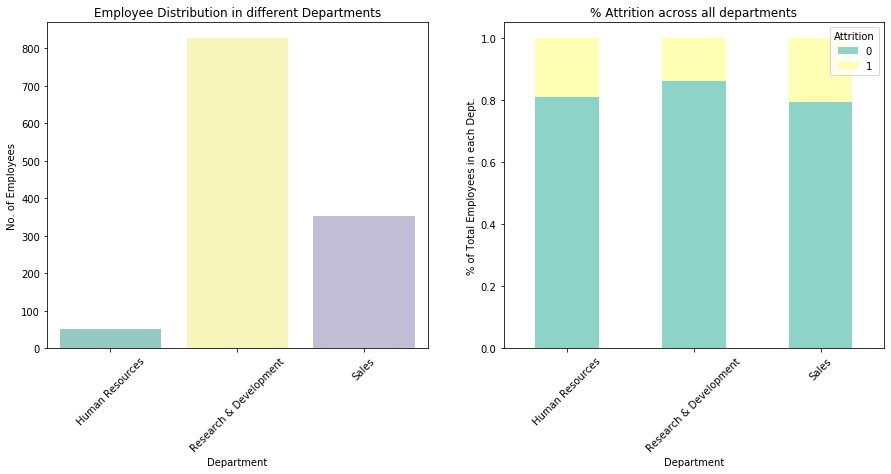

In [6]:
curr_dept = data[data["Attrition"] == 0]["Department"].value_counts(normalize= True)
quit_dept = data[data["Attrition"] == 1]["Department"].value_counts()

dept = sorted(curr_employee["Department"].unique())
print("Current Workforce in % (Department):")
for i in range(len(dept)):
    print(dept[i] + " :", round(curr_dept[dept[i]] * 100,2))

print("\nVacancies in each Department :")
for i in range(len(dept)):
    print(dept[i] + " :", quit_dept[dept[i]])    
    
fig , ax = plt.subplots(1,2, figsize= (15,6))
ax[0].set_title("Employee Distribution in different Departments")
sns.countplot(data[data["Attrition"] == 0]["Department"],order=dept, ax= ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation= 45)
ax[0].set_ylabel("No. of Employees")

ax[1].set_title("% Attrition across all departments")
ax[1].set_ylabel("% of Total Employees in each Dept.")
table = pd.crosstab(data["Department"],data["Attrition"])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax= ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation= 45)
print(table)
plt.savefig("DepartmentVSAttrition.png",bbox_inches = "tight")

#### Gender , Job Level and Attrition
- This is to understand if the company has any underlying biases towards a particular Gender.
- To understand that, we can see the distribution and income of Females to Males at each Job Level.
- The Company has a Sex Ratio of 60:40 (Male : Female Ratio = 1.5) which is quite healthy.
- Sex Ratio at Joblevel 1 (1.74) and Joblevel 5 (2.04) are higher than the Sex Ratio at the Company Level.
- This indicates that more males are being preferred in the initial joblevels (eg. Hiring Bias) and the top management (eg. Promotion Bias), which violates the Diversity code, and needs to be addressed/questioned.
- The average income or the distribution of income at each joblevel is almost the same for both the gender.
- The Attrition Rates are slightly higher among males (17%) compared to females (14%).

Current Workforce in % (Gender):
Males:  59.37
Females:  40.63

Employees who Quit % (Gender):
Males:  63.29
Females:  36.71

Percentage of Employees in different Job Levels based on Gender :
Gender       Female       Male
JobLevel                      
1         29.141717  34.699454
2         40.319361  38.251366
3         16.367265  14.207650
4          9.980040   6.967213
5          4.191617   5.874317

Average Salary of Employees in a particular Job Level for different Genders :
                  mean              
Gender          Female          Male
JobLevel                            
1          2846.130137   2859.165354
2          5405.534653   5524.246429
3         10177.695122   9665.009615
4         15476.120000  15761.627451
5         19090.666667  19209.604651

Sex Ratio at Different Job Level :
For JobLevel 1 : [1.73972603]
For JobLevel 2 : [1.38613861]
For JobLevel 3 : [1.26829268]
For JobLevel 4 : [1.02]
For JobLevel 5 : [2.04761905]


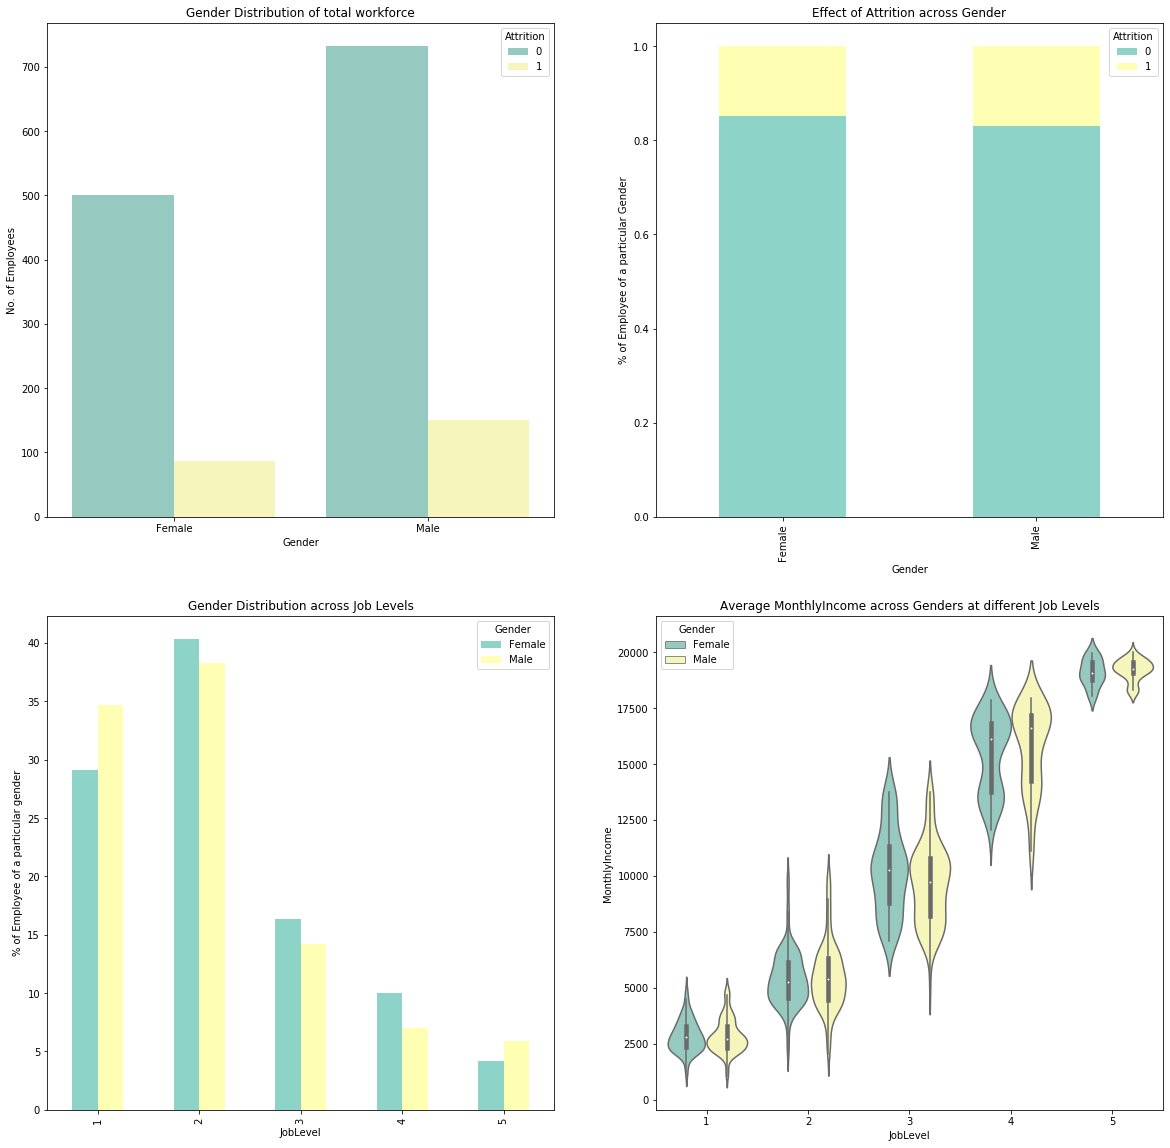

In [7]:
curr_genderdist = data[data["Attrition"] == 0]["Gender"].value_counts(normalize= True)
quit_genderdist = data[data["Attrition"] == 1]["Gender"].value_counts(normalize= True)
genderVSattrition = pd.crosstab(index=tot_employee["Gender"],
                                columns=tot_employee["Attrition"],
                                normalize= "index")
genderVSlevel = pd.crosstab(curr_employee["JobLevel"],
                            curr_employee["Gender"],
                            normalize= "columns")*100
genderVSincome = pd.pivot_table(data= curr_employee,
                                values= "MonthlyIncome",
                                index="JobLevel",
                                columns="Gender",
                                aggfunc= [np.mean])

print("Current Workforce in % (Gender):")
print("Males: ",round(curr_genderdist["Male"] * 100,2))
print("Females: ",round(curr_genderdist["Female"] * 100,2))

print("\nEmployees who Quit % (Gender):")
print("Males: ",round(quit_genderdist["Male"] * 100,2))
print("Females: ",round(quit_genderdist["Female"] * 100,2))

print("\nPercentage of Employees in different Job Levels based on Gender :")
print(genderVSlevel)

print("\nAverage Salary of Employees in a particular Job Level for different Genders :")
print(genderVSincome)

print("\nSex Ratio at Different Job Level :")
for i in range(1,len(curr_employee["JobLevel"].unique())+1):
    males = curr_employee[(curr_employee["JobLevel"] == i) & 
                          (curr_employee["Gender"] == 'Male')]["Gender"].value_counts()
    females = curr_employee[(curr_employee["JobLevel"] == i) & 
                            (curr_employee["Gender"] == 'Female')]["Gender"].value_counts()
    print("For JobLevel %d :"%i,(float(males)/females).values)

fig , ax = plt.subplots(2,2, figsize= (20,20))
ax[0,0].set_title("Gender Distribution of total workforce")
sns.countplot(tot_employee["Gender"], hue= tot_employee["Attrition"],ax= ax[0,0])
ax[0,0].set_ylabel("No. of Employees")

ax[0,1].set_title("Effect of Attrition across Gender")
ax[0,1].set_ylabel("% of Employee of a particular Gender")
genderVSattrition.plot(kind="bar",stacked=True, ax= ax[0,1])

ax[1,0].set_title("Gender Distribution across Job Levels")
ax[1,0].set_ylabel("% of Employee of a particular gender")
genderVSlevel.plot(kind="bar",ax= ax[1,0])

ax[1,1].set_title("Average MonthlyIncome across Genders at different Job Levels")
sns.violinplot(x= curr_employee["JobLevel"],y=curr_employee["MonthlyIncome"],
               hue= curr_employee["Gender"],hue_order=["Female","Male"],ax= ax[1,1])
ax[1,1].set_ylabel("MonthlyIncome")

plt.savefig("GenderVSAttrition.png",bbox_inches = "tight",dpi=300)

#### Age of WorkForce and Years at Company
- Since people of the same age group have similar thoughts/needs, we divided all the employees in 6 Age Groups.
- In the Current Work Force, Majority (32%) of employees belong to the Age Group of 32-38 ,whereas only a small group(5%) of employees belong to 18-24 category. 
- Amongst the people who quit, Majority (34%) of employees belonged to the Age Group of 25-31 , whereas only a fraction(5%) of employees belonged to >=53 category.
- The highest attrition was observed in the age group of 18-24(39%) followed by 25-31(22%),whereas the age group with least attrition was 39-45(10%). This can be attributed to the fact that at a younger age employees would feel the need to switch over to find a job aligning to their interest.But once you have a family and working towards retirement, you would take lesser risks and work for stability.
- This can also be visualized using the Employee Loyalty Ratio ( Total Years in Company / Total Work Experience) , the decreasing medians at each level implies that as total number of employee who are loyal to the company decrease from the youngest employees to oldest employees.


Attrition         0         1
Age_Group                    
18-24      0.608247  0.391753
25-31      0.776536  0.223464
32-38      0.875831  0.124169
39-45      0.900344  0.099656
46-52      0.874251  0.125749
>=53       0.877358  0.122642
WorkForce Age Distribution (in %) :

Age 18-24 : 4.79
Age 25-31 : 22.55
Age 32-38 : 32.04
Age 39-45 : 21.25
Age 46-52 : 11.84
Age >=53 : 7.54


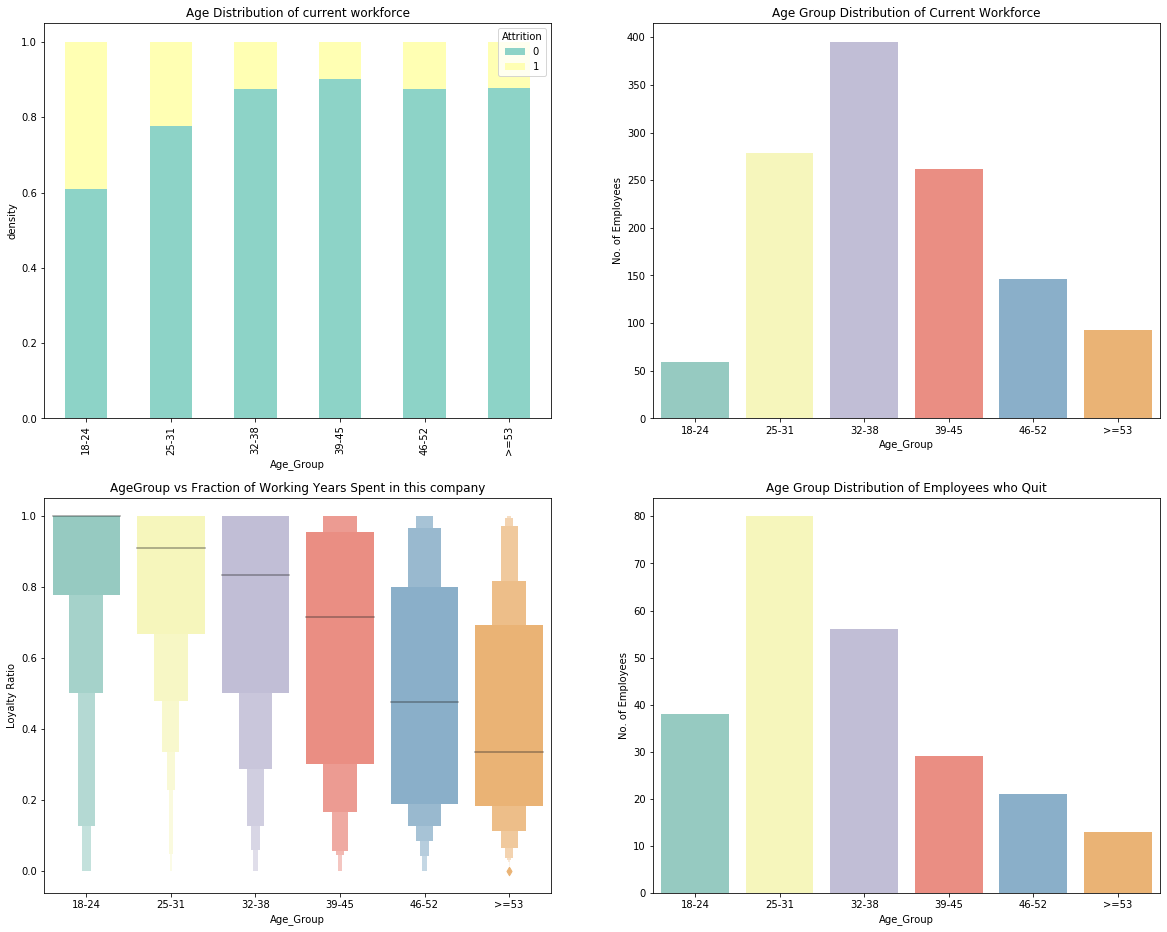

In [36]:
copy_data = data.copy(deep= True)
copy_data["Age_Group"] = ""
copy_data.loc[copy_data["Age"].between(18,24),"Age_Group"] = "18-24"
copy_data.loc[copy_data["Age"].between(25,31),"Age_Group"] = "25-31"
copy_data.loc[copy_data["Age"].between(32,38),"Age_Group"] = "32-38"
copy_data.loc[copy_data["Age"].between(39,45),"Age_Group"] = "39-45"
copy_data.loc[copy_data["Age"].between(46,52),"Age_Group"] = "46-52"
copy_data.loc[copy_data["Age"] >= 53,"Age_Group"] = ">=53"

curr_agedist = copy_data[data["Attrition"] == 0]["Age_Group"].value_counts(normalize= True)
quit_agedist = copy_data[data["Attrition"] == 1]["Age_Group"].value_counts(normalize= True)

ageGroupsVSattrition = pd.crosstab(index=copy_data["Age_Group"],
                                   columns=tot_employee["Attrition"],
                                   normalize= "index")
print(ageGroupsVSattrition)

copy_data["LERatio"] = copy_data.YearsAtCompany/copy_data.TotalWorkingYears
copy_data["LERatio"].dropna()
                                                                           
ageGroups = sorted(copy_data["Age_Group"].unique())
print("WorkForce Age Distribution (in %) :\n")
for i in range(len(ageGroups)):
    print("Age " + ageGroups[i] + " :", round(curr_agedist[ageGroups[i]] * 100,2))

fig , ax = plt.subplots(2,2, figsize= (20,16))
ax[0,0].set_title("Age Distribution of current workforce")
ax[0,0].set_ylabel("density")
ageGroupsVSattrition.plot(kind="bar",stacked=True,ax= ax[0,0])

ax[0,1].set_title("Age Group Distribution of Current Workforce")
sns.countplot(copy_data[data["Attrition"] == 0]["Age_Group"], order=ageGroups, ax= ax[0,1])
ax[0,1].set_ylabel("No. of Employees")

ax[1,0].set_title("AgeGroup vs Fraction of Working Years Spent in this company")
sns.boxenplot(x = copy_data["Age_Group"],
              y = copy_data["LERatio"],
              order=ageGroups, ax= ax[1,0])
ax[1,0].set_ylabel("Loyalty Ratio")

ax[1,1].set_title("Age Group Distribution of Employees who Quit")
sns.countplot(copy_data[copy_data["Attrition"]==1]["Age_Group"], order=ageGroups, ax= ax[1,1])
ax[1,1].set_ylabel("No. of Employees")

plt.savefig("AgeVSAttrition.png",bbox_inches = "tight",dpi=300)

### Department Level Insights
Following insights were drawn to inspect the working environment across each departments. 

#### Best Department 
- Since the feedback from all employees were taken for different parameters such as Job Involvement, Job Satisfaction etc. we wanted to know if one of the department stands out amongst them.But, analyzing the average rating for each department, we see that the numbers are not significantly different and no such conclusions can be drawn.
- From the graphs for individual parameters for each department, we can draw the following conclusions:
    1. For Environment Satisfaction, HR has the highest positive feedback(63%) followed closely by R&D(62%) and Sales(58%)
    2. For Job Involvement,There is no significant differences in feedback across departments.
    3. For Work Life Balance, HR has the highest positive feedback(82%) followed by Sales(73%) and R&D(69%)
    4. For Job Satisfaction, R&D has the highest positive feedback(62%) followed by Sales(61%) and HR(50%)
- If by using further analysis, we infer that one of the parameters is a good predictor(cause) for Attrition,we can verify if the same effect is observed in the respective department and then some changes in management can be accommodated to improve that parameter.

In [37]:
tot_employee["TotalRating"] = data.EnvironmentSatisfaction + data.JobInvolvement + data.JobSatisfaction + data.WorkLifeBalance
ratings = ["EnvironmentSatisfaction","JobInvolvement","JobSatisfaction","WorkLifeBalance","TotalRating"]
ratingVSdept = pd.pivot_table(data= tot_employee,
                              index= "Department",
                              values= ratings,
                              aggfunc= "mean")
print("Average Scores for each department across all Metrics :")
ratingVSdept[ratings]

Average Scores for each department across all Metrics :


,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,WorkLifeBalance,TotalRating
Department,,,,,
Human Resources,2.682540,2.746032,2.603175,2.920635,10.952381
Research & Development,2.744017,2.741935,2.726327,2.725286,10.937565
Sales,2.679372,2.701794,2.751121,2.816143,10.948430


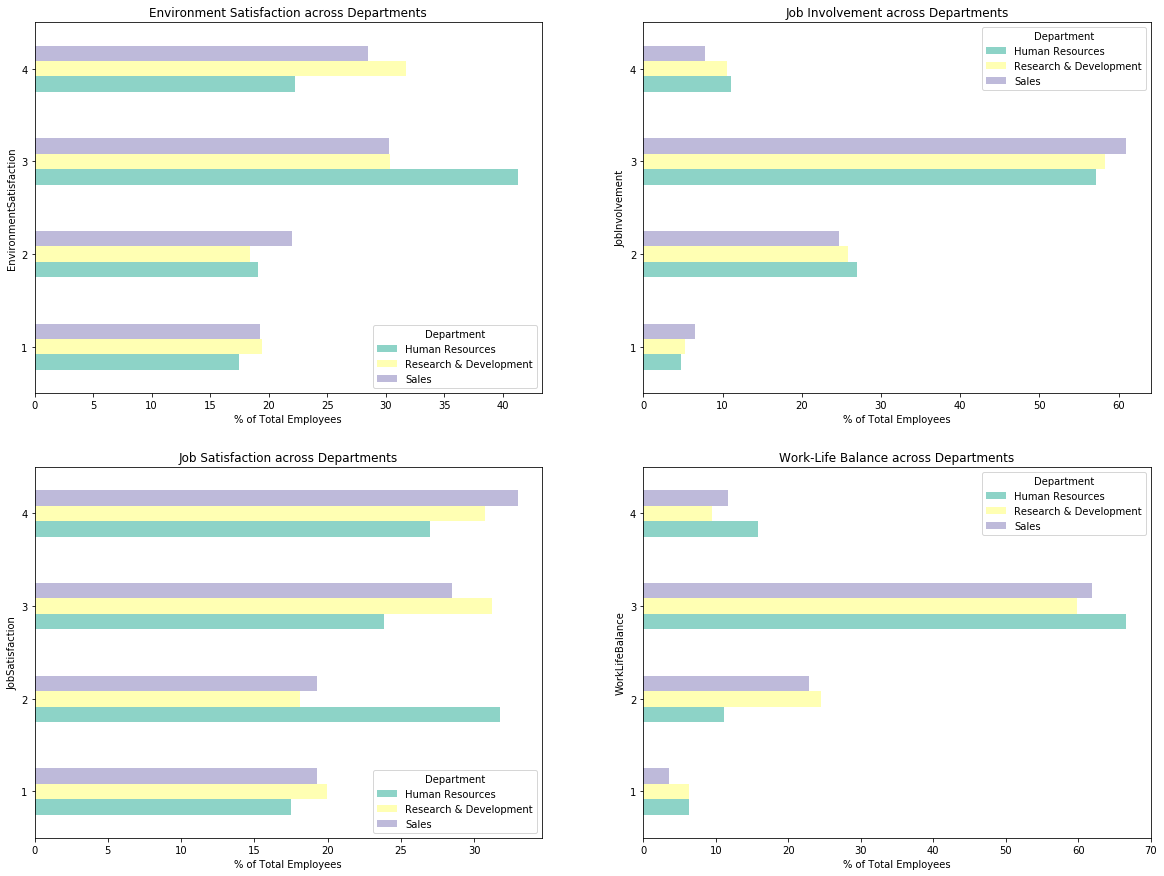

In [38]:
#ig, ax = plt.subplots(2,2,figsize= (20,15))
envSatisfactionVSdept = pd.crosstab(columns= tot_employee["Department"],
                                    index= tot_employee["EnvironmentSatisfaction"],
                                    normalize= "columns")*100
jobInvolvementVSdept = pd.crosstab(columns= tot_employee["Department"],
                                    index= tot_employee["JobInvolvement"],
                                    normalize= "columns")*100
jobSatisfactionVSdept = pd.crosstab(columns= tot_employee["Department"],
                                    index= tot_employee["JobSatisfaction"],
                                    normalize= "columns")*100
workLifeBalanceVSdept = pd.crosstab(columns= tot_employee["Department"],
                                    index= tot_employee["WorkLifeBalance"],
                                    normalize= "columns")*100
fig,ax = plt.subplots(2,2,figsize = (20,15))
envSatisfactionVSdept.plot(kind="barh",ax=ax[0,0])
ax[0,0].set_title("Environment Satisfaction across Departments")
ax[0,0].set_xlabel("% of Total Employees")
jobInvolvementVSdept.plot(kind="barh",ax=ax[0,1])
ax[0,1].set_title("Job Involvement across Departments")
ax[0,1].set_xlabel("% of Total Employees")
jobSatisfactionVSdept.plot(kind="barh",ax=ax[1,0])
ax[1,0].set_title("Job Satisfaction across Departments")
ax[1,0].set_xlabel("% of Total Employees")
workLifeBalanceVSdept.plot(kind="barh",ax=ax[1,1])
ax[1,1].set_title("Work-Life Balance across Departments")
ax[1,1].set_xlabel("% of Total Employees")

plt.savefig("RatingsVSDepartment.png",bbox_inches = "tight",dpi=300)

#### Operating Costs
- The total monthly operating cost for the company is $8.42 million.
- Out of which 65% of the cost is spent on Research and Development,30% on generating Sales and rest 5% for managing human resources.

Total Monthly Operating Cost for the company (in $) : 8424768

Monthly Operating Cost for each Department (in $)
Human Resources : 4.45
Research and Development : 65.16
Sales : 30.39


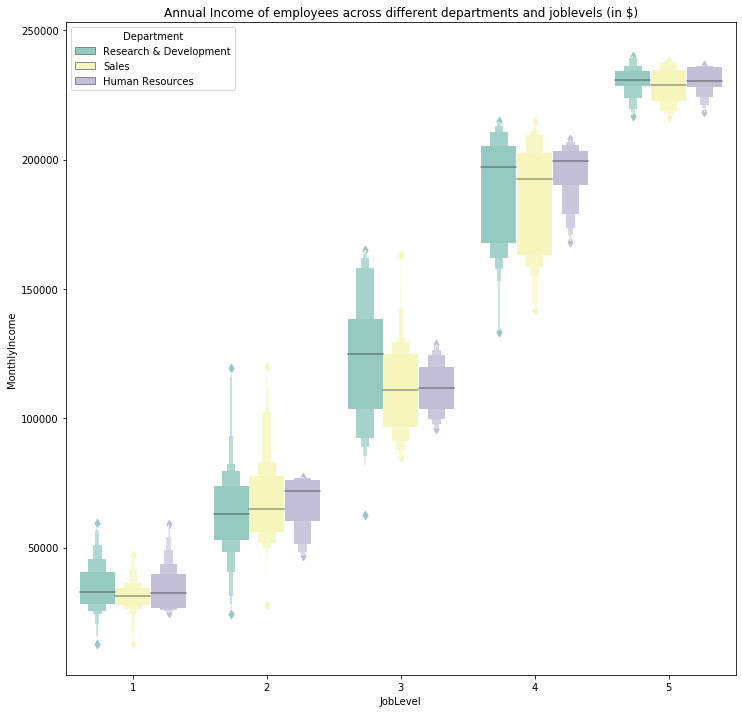

In [39]:
operatingCost = pd.pivot_table(data=curr_employee,
                               index= "Department",
                               values= "MonthlyIncome",
                               aggfunc= "sum")
total = np.sum(operatingCost.loc[:,"MonthlyIncome"])
hr = operatingCost.loc["Human Resources","MonthlyIncome"]
rnd = operatingCost.loc["Research & Development","MonthlyIncome"]
sales = operatingCost.loc["Sales","MonthlyIncome"]
print("Total Monthly Operating Cost for the company (in $) :",total)
print("\nMonthly Operating Cost for each Department (in $)")
print("Human Resources :",round(hr/float(total)*100,2))
print("Research and Development :",round(rnd/float(total)*100,2))
print("Sales :",round(sales/float(total)*100,2))

plt.figure(figsize=(12,12))
plt.title("Annual Income of employees across different departments and joblevels (in $)")
sns.boxenplot(x= curr_employee["JobLevel"],y=curr_employee["MonthlyIncome"]*12,hue=curr_employee["Department"])

plt.savefig("IncomeVSDepartment.png",bbox_inches = "tight",dpi=300)

#### Age and Gender preferences
- This is to dissect the department on the basis of Age and Gender to understand if any of these factors have an impact on Department Level Attrition.
- For Human Resources, Younger employees (18-31) and Females are more likely to quit the company :
    1. High attrition rate is observed for the employees of the age group (18-24), which is 66%, and (25-31) which is 37%. The Attrition Rate for employees >=39 years is negligible.
    2. The Attrition Rate of Females(30%) is more than twice that of Males(13%).
- For Research and Development, Younger Employees (18-31) or Males are more likely to quit the company :
    1. Highest Attrition Rate is observed for employees of the age group (18-24), which is 33%, and (25-31), which is 20%.
    2. The Attrition Rate of Males(15%) is slightly larger than Females(11%)
- For Sales, Employees of Age group (18-31) and (46-52) are more likely to quit the company:
    1. Highest Attrition Rate is observed for employees of the age group (18-24), which is 52%, and (46-52), which is 24%.
    2. The Attrition Rate amongst, Males and Females are almost the same (20% and 21% respectively)
 

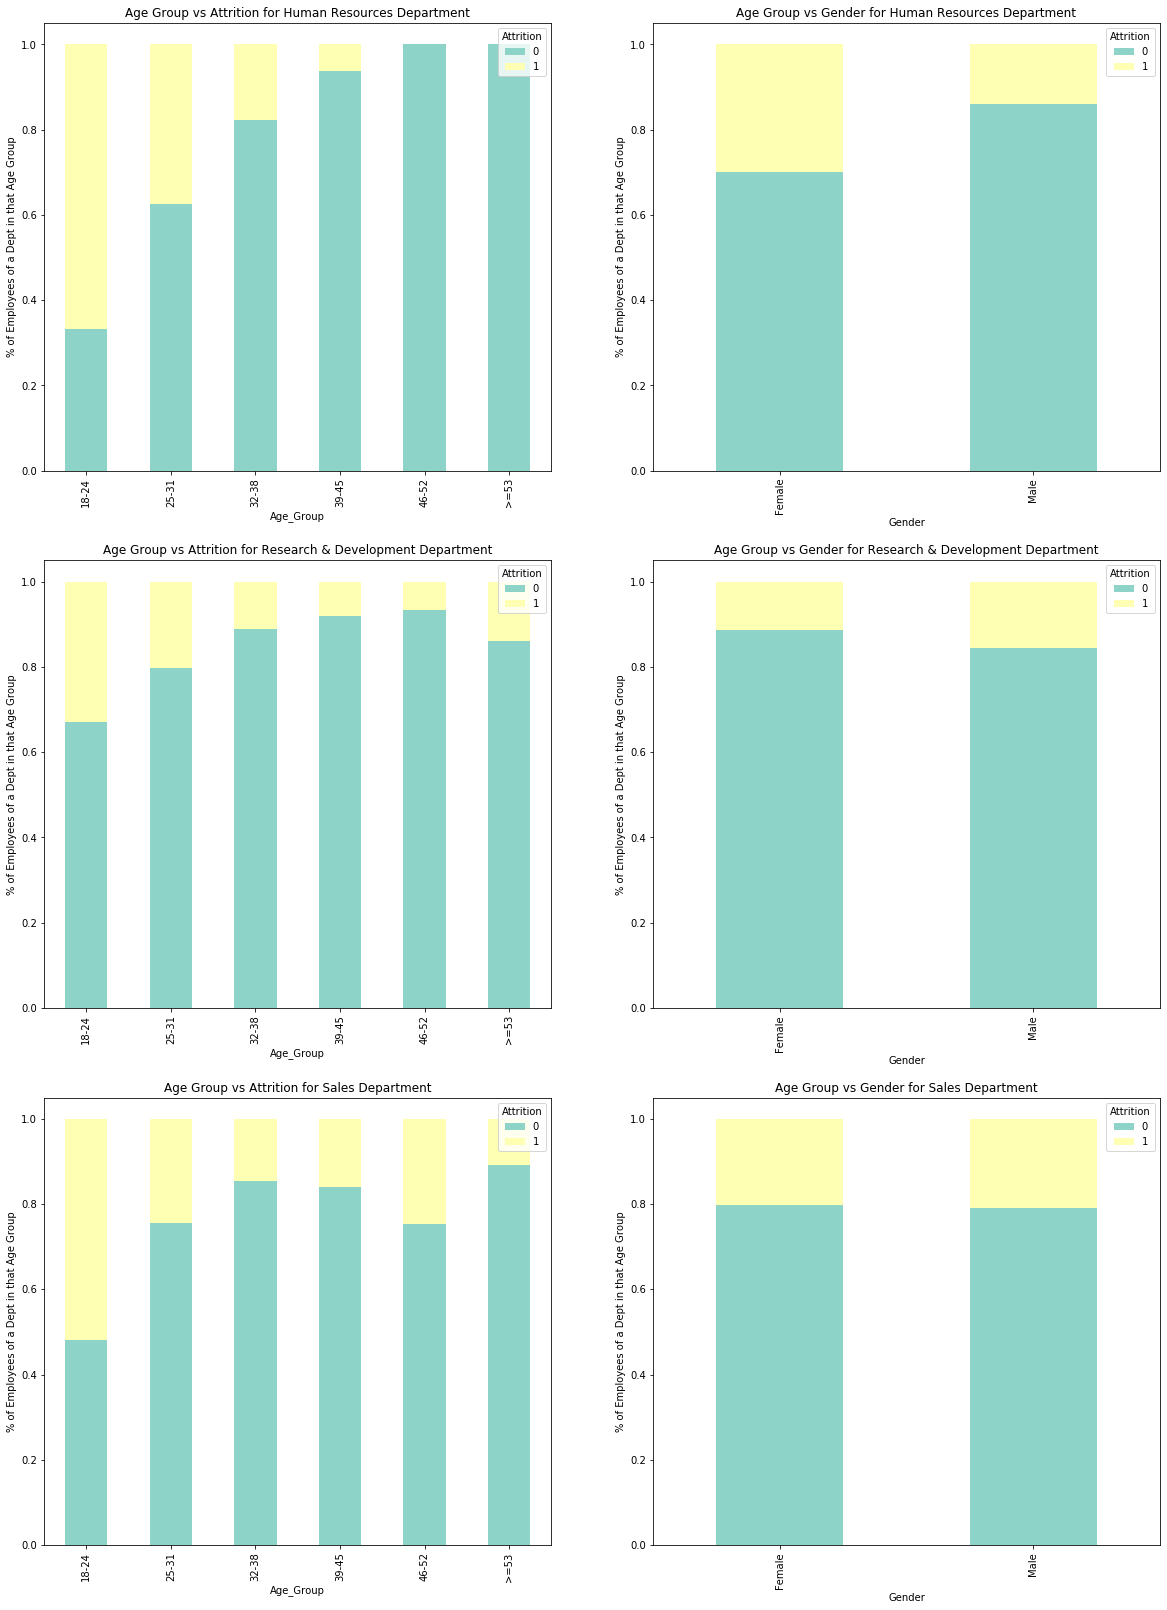

In [40]:
fig, ax = plt.subplots(3,2,figsize=(20,28))
dept = sorted(curr_employee["Department"].unique())
for i in range(len(dept)):
    dept_filter = copy_data["Department"] == dept[i]
    ageVSdeptVSattrition = pd.crosstab(index=copy_data[dept_filter]["Age_Group"],
                                       columns=tot_employee["Attrition"],
                                       normalize= "index")
    ageVSdeptVSattrition.plot(kind='bar',stacked=True,ax= ax[i,0])
    ax[i,0].set_title("Age Group vs Attrition for %s Department" % dept[i])
    ax[i,0].set_ylabel("% of Employees of a Dept in that Age Group")
    
    ageVSgenderVSattrition = pd.crosstab(index=copy_data[dept_filter]["Gender"],
                                       columns=tot_employee["Attrition"],
                                       normalize= "index")
    ageVSgenderVSattrition.plot(kind='bar',stacked=True,ax= ax[i,1])
    ax[i,1].set_title("Age Group vs Gender for %s Department" % dept[i])
    ax[i,1].set_ylabel("% of Employees of a Dept in that Age Group")
    
    plt.savefig("AgeGenderVSDepartment.png",bbox_inches = "tight",dpi=300)

#### Department : Taking the longest time to Promote
- Across the departments, comparing the Years spent by employees in the company: 
    - Sales department has the highest median years at company of 6 years, followed by HR(5 years) and R&D(5 years).
    - 75 percentile of employees in each department have served less than or equal to 10 years at the company.
    - Since its the younger employees who are more likely to quit the company, the median age for people leaving the company for Sales is 3.5 years,followed by R&D (3 years) and HR (2.5 years).
- Comparing the Years since last promotion across departments :
    - 75 percentile of employees in Sales have received a Promotion in the last 4 years, whereas for R&D, 75 percentile of employees have received a Promotion in the last 3 years and for HR, same number have received within 2.5 years.
    - So employees in HR receives the fastest promotions across all the dept.

0.5
1.0
1.0


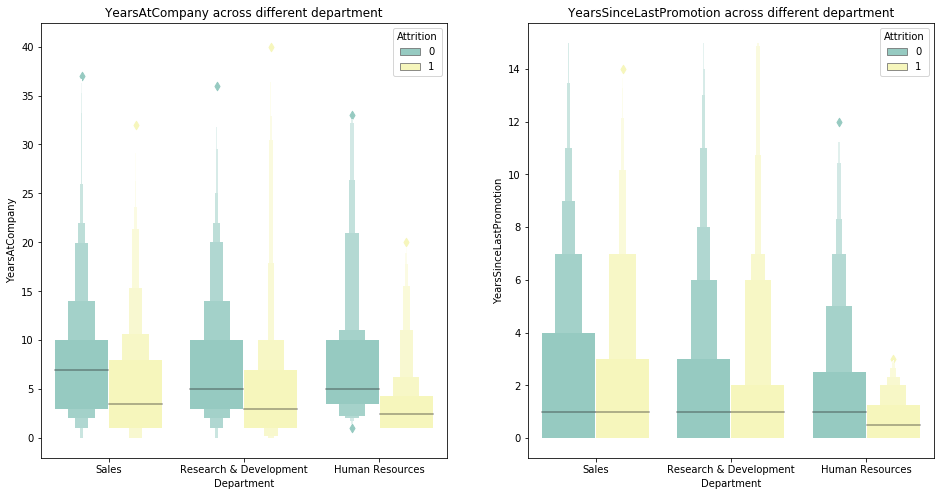

In [41]:
fig,ax = plt.subplots(1,2,figsize= (16,8))
sns.boxenplot(data= tot_employee, x="Department", y='YearsAtCompany',hue='Attrition',ax=ax[0])
ax[0].set_title("YearsAtCompany across different department")
sns.boxenplot(data= tot_employee, x="Department", y='YearsSinceLastPromotion',hue='Attrition',ax= ax[1])
ax[1].set_title("YearsSinceLastPromotion across different department")

print(quit_employee[quit_employee["Department"] == "Human Resources"]["YearsSinceLastPromotion"].median())
print(quit_employee[quit_employee["Department"] == "Research & Development"]["YearsSinceLastPromotion"].median())
print(quit_employee[quit_employee["Department"] == "Sales"]["YearsSinceLastPromotion"].median())

plt.savefig("PromotionVSDepartment.png",bbox_inches = "tight",dpi=300)

#### Department : Where overtime is common
- Across the departments, around 27-28% of the working force are asked to / seek to work OverTime.

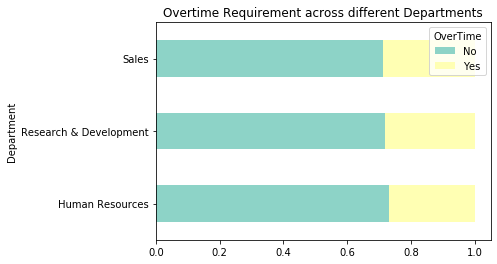

In [42]:
deptVSovertime = pd.crosstab(index=tot_employee['Department'],columns=tot_employee['OverTime'],normalize='index')
deptVSovertime.plot(kind='barh',stacked=True)
plt.title("Overtime Requirement across different Departments")

plt.savefig("OvertimeVSDepartment.png",bbox_inches = "tight",dpi=300)

#### Department : Which provides most Business Travel opportunities
- Around 17-18% of employees, of each department, are asked to Travel Frequently in all departments, off which R&D employees get the majority Travel Opportunities.
- Around 70-73% of employees, of each department, chose Travel Rarely, with HR employees being the highest amongst all.
- Around 10% of employees in each department, are never provided opportunities for Business Travel.
- Overall, no department stands out to get the most Business Travel Opportunities.

BusinessTravel          Non-Travel  Travel_Frequently  Travel_Rarely
Department                                                          
Human Resources           0.095238           0.174603       0.730159
Research & Development    0.100937           0.189386       0.709677
Sales                     0.105381           0.188341       0.706278


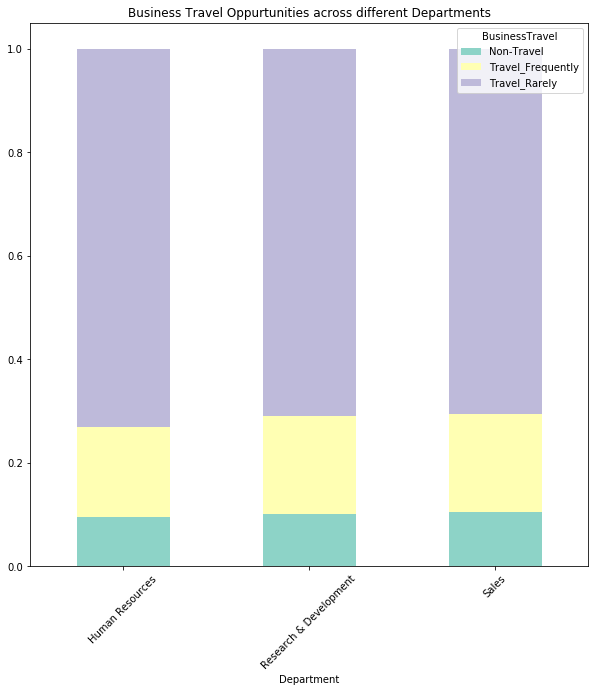

In [43]:
deptVStravel = pd.crosstab(index=tot_employee['Department'],columns=tot_employee['BusinessTravel'],normalize='index')
fig,ax = plt.subplots(1,1,figsize=(10,10))
deptVStravel.plot(kind='bar',stacked=True,ax=ax)
plt.title("Business Travel Oppurtunities across different Departments")
plt.xticks(rotation= 45)
print(deptVStravel)

plt.savefig("TravelVSDepartment.png",bbox_inches = "tight",dpi=300)

### Insights on the Attrition Rate
This section deals with exploring various factors which might lead to Attrition in the company, and also try to understand what might be potential causes for it. 

#### Low Environment Satisfaction
- 63% of the people in the current work force gave a positive feedback towards the Environment Satisfaction.
- Only 48% of the people who have quit the work force, gave a negative feedback towards Environment Satisfaction. 
- Based on above two facts, it can be concluded that Low Environment Satisfaction isnt a good predictor for attrition.

- Potential Cause for Low Environment Satisfaction :
    - Department : Sales(41%) has highest negative feedback for Environment Satisfaction followed by R&D(38%) and HR(36%)
    - Gender : No significant difference in Environment Satisfaction amongst the Genders.
    - Job Level : No significant difference in Environment Satisfaction across Job Levels.
    - YearsWithCurrManager : The distribution of YearsWithCurrManager is almost the same for employees who gave positive and negative feedback for Environment Satisfaction. 
- So Department or the type of work, is the main cause for Low Environment Satisfaction.

LowEnvSat        No       Yes
Attrition                    
0          0.630170  0.369830
1          0.514768  0.485232


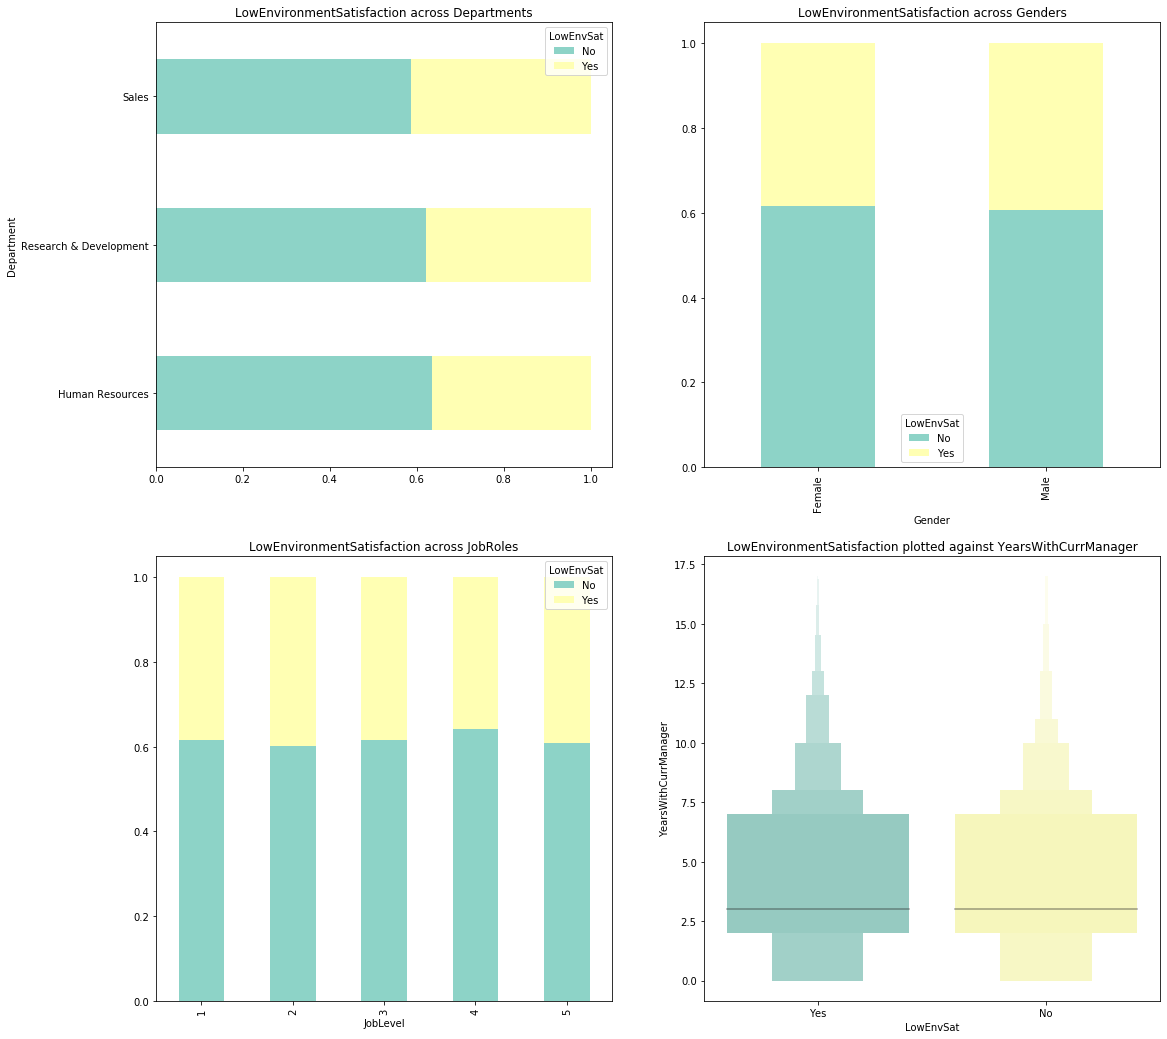

In [44]:
# EnvSat -> Department , Gender ,JobRole, YearsWithCurrManager
myData = copy_data.copy(deep= True)
myData["LowEnvSat"] = "No"
myData.loc[myData["EnvironmentSatisfaction"] <= 2,"LowEnvSat"] = "Yes"
myDataVSattrition = pd.crosstab(index=myData["Attrition"],columns = myData["LowEnvSat"],normalize="index")
myDataVSdept = pd.crosstab(index=myData["Department"],columns = myData["LowEnvSat"],normalize="index")
myDataVSgender = pd.crosstab(index=myData["Gender"],columns = myData["LowEnvSat"],normalize="index")
myDataVSlevel = pd.crosstab(index=myData["JobLevel"],columns = myData["LowEnvSat"],normalize="index")

print(myDataVSattrition)

fig,ax = plt.subplots(2,2,figsize=(18,18))
myDataVSdept.plot(kind='barh',stacked=True,ax=ax[0,0])
ax[0,0].set_title("LowEnvironmentSatisfaction across Departments")
myDataVSgender.plot(kind='bar',stacked=True,ax=ax[0,1])
ax[0,1].set_title("LowEnvironmentSatisfaction across Genders")
myDataVSlevel.plot(kind='bar',stacked=True,ax=ax[1,0])
ax[1,0].set_title("LowEnvironmentSatisfaction across JobRoles")
sns.boxenplot(x=myData["LowEnvSat"],y=myData["YearsWithCurrManager"],ax=ax[1,1])
ax[1,1].set_title("LowEnvironmentSatisfaction plotted against YearsWithCurrManager")

plt.savefig("EnvSatVSAttrition.png",bbox_inches = "tight",dpi=300)

#### Low Job Involvement
- 71% of the people in the current work force gave a positive feedback towards the Job Involvement.
- Only 42% of the people who have quit the work force, gave a negative feedback towards Job Involvement. 
- Based on above two facts, it can be concluded that Job Involvement isn't a good predictor for attrition.

- Potential Cause for Low Job Involvement :
    - Department : No significant difference in Job Involvement amongst the Departments.
    - Job Level : 35% of employees in Level 3 have given a negative feedback compared to 28% in Level 4.
    - Business Travel : 35% of employees who don't travel gave a negative feedback compared to 30% of people who were given travel opportunity.
    - Marital Status : 33% of employees who were "Single" gave a negative feedback compared to 31% of employees who were "Married".
    - Age Group : Younger Employees have given more negative feedbacks compared to older employees.
    - YearsAtCompany : Employees who have spent a longer time in the employee have given a negative feedback towards Job Involvement , but still choose to continue to work in the org.
- So Business Travel opportunities,Marital Status and Age Group are potential causes for Low Job Involvement.

LowJobInv        No       Yes
Attrition                    
0          0.708840  0.291160
1          0.582278  0.417722


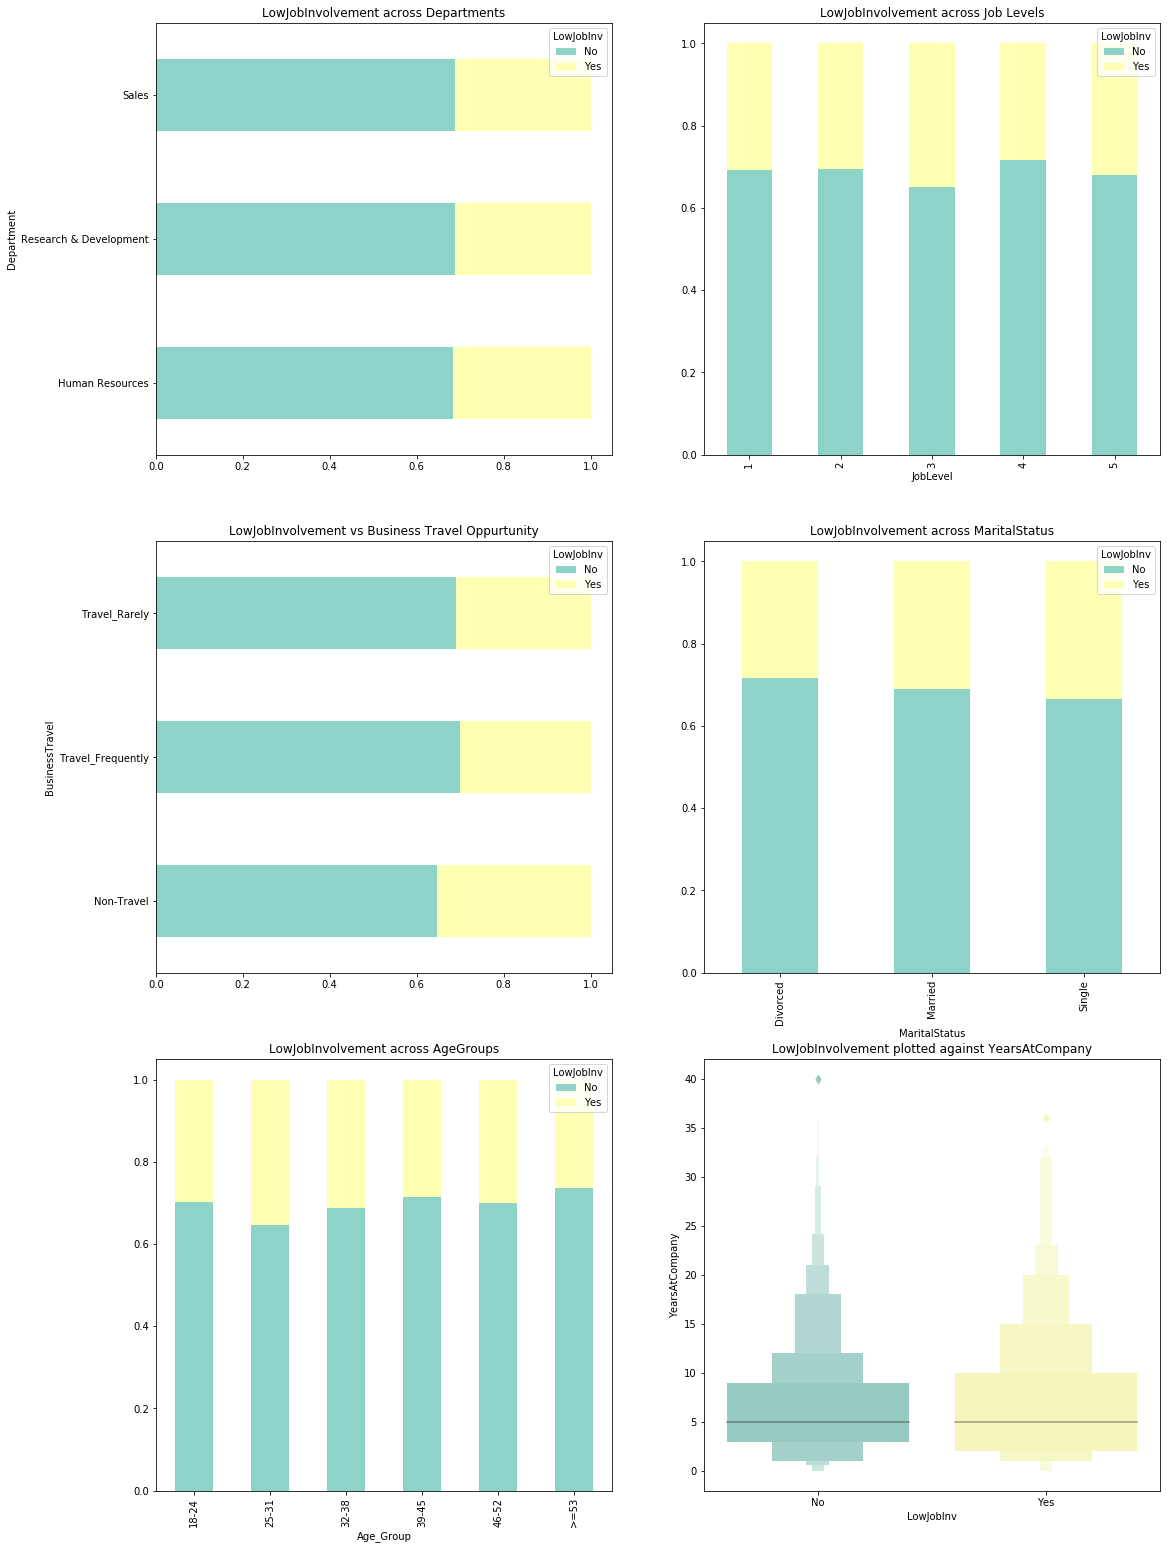

In [45]:
# JobInvolvement -> BusinessTravel, Department,Gender, MaritalStatus, AgeGroups , YearsAtCompany

myData["LowJobInv"] = "No"
myData.loc[myData["JobInvolvement"] <= 2,"LowJobInv"] = "Yes"
myDataVSattrition = pd.crosstab(index=myData["Attrition"],columns = myData["LowJobInv"],normalize="index")
myDataVSdept = pd.crosstab(index=myData["Department"],columns = myData["LowJobInv"],normalize="index")
myDataVSlevel = pd.crosstab(index=myData["JobLevel"],columns = myData["LowJobInv"],normalize="index")
myDataVStravel = pd.crosstab(index=myData["BusinessTravel"],columns = myData["LowJobInv"],normalize="index")
myDataVSmaritalstat = pd.crosstab(index=myData["MaritalStatus"],columns = myData["LowJobInv"],normalize="index")
myDataVSageGroup = pd.crosstab(index=myData["Age_Group"],columns = myData["LowJobInv"],normalize="index")

print(myDataVSattrition)

fig,ax = plt.subplots(3,2,figsize=(18,27))
myDataVSdept.plot(kind='barh',stacked=True,ax=ax[0,0])
ax[0,0].set_title("LowJobInvolvement across Departments")
myDataVSlevel.plot(kind='bar',stacked=True,ax=ax[0,1])
ax[0,1].set_title("LowJobInvolvement across Job Levels")
myDataVStravel.plot(kind='barh',stacked=True,ax=ax[1,0])
ax[1,0].set_title("LowJobInvolvement vs Business Travel Oppurtunity")
myDataVSmaritalstat.plot(kind='bar',stacked=True,ax=ax[1,1])
ax[1,1].set_title("LowJobInvolvement across MaritalStatus")
myDataVSageGroup.plot(kind='bar',stacked=True,ax=ax[2,0])
ax[2,0].set_title("LowJobInvolvement across AgeGroups")
sns.boxenplot(x=myData["LowJobInv"],y=myData["YearsAtCompany"],ax=ax[2,1])
ax[2,1].set_title("LowJobInvolvement plotted against YearsAtCompany")

plt.savefig("JobInvVSAttrition.png",bbox_inches = "tight",dpi=300)

#### Low Job Satisfaction
- 63% of the people in the current work force gave a positive feedback towards the Job Satisfaction.
- Only 47% of the people who have quit the work force, gave a negative feedback towards Job Satisfaction. 
- Based on above two facts, it can be concluded that Job Satisfaction isn't a good predictor for attrition.

- Potential Cause for Low Job Satisfaction :
    - Overtime : No significant difference in Job Satisfaction due to Overtime duties.
    - Gender : No significant difference in Job Satisfaction across genders.
    - Business Travel : 34% of employees who don't travel gave a negative feedback compared to 40% of people who travel frequently.
    - Marital Status : No significant difference in Job Satisfaction based on Marital Status.
    - Age Group : No significant difference in Job Satisfaction based on Age Groups.
    - YearsSinceLastPromotion : No significant difference in distribution of employees with positive and negative feedback
- So Business Travel opportunities was the only potential cause identified for Low Job Satisfaction.

LowJobSat        No       Yes
Attrition                    
0          0.629359  0.370641
1          0.527426  0.472574


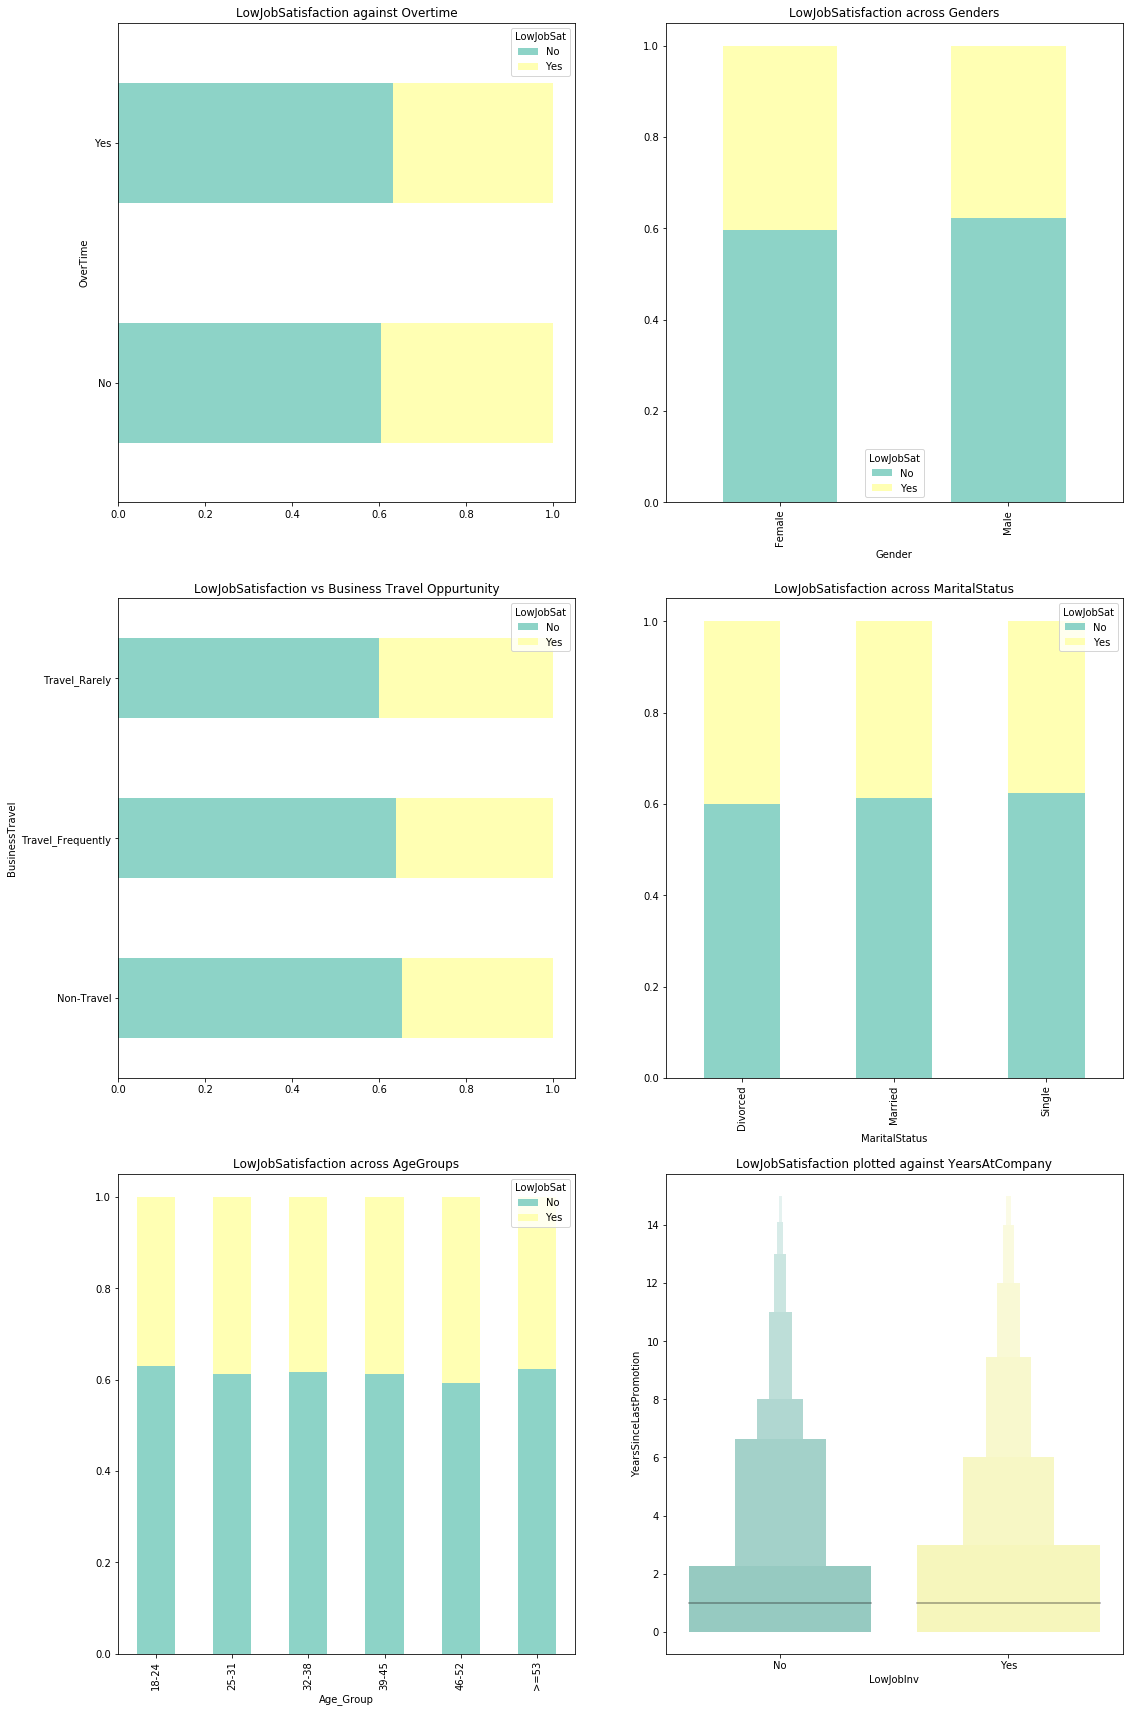

In [46]:
# JobSatisfaction -> Overtime, Business Travel,Gender, MaritalStatus,YearsSinceLastPromotion,AgeGroups

myData["LowJobSat"] = "No"
myData.loc[myData["JobSatisfaction"] <= 2,"LowJobSat"] = "Yes"
myDataVSovertime = pd.crosstab(index=myData["OverTime"],columns = myData["LowJobSat"],normalize="index")
myDataVSgender = pd.crosstab(index=myData["Gender"],columns = myData["LowJobSat"],normalize="index")
myDataVStravel = pd.crosstab(index=myData["BusinessTravel"],columns = myData["LowJobSat"],normalize="index")
myDataVSmaritalstat = pd.crosstab(index=myData["MaritalStatus"],columns = myData["LowJobSat"],normalize="index")
myDataVSageGroup = pd.crosstab(index=myData["Age_Group"],columns = myData["LowJobSat"],normalize="index")
myDataVSattrition = pd.crosstab(index=myData["Attrition"],columns = myData["LowJobSat"],normalize="index")

print(myDataVSattrition)

fig,ax = plt.subplots(3,2,figsize=(18,30))
myDataVSovertime.plot(kind='barh',stacked=True,ax=ax[0,0])
ax[0,0].set_title("LowJobSatisfaction against Overtime")
myDataVSgender.plot(kind='bar',stacked=True,ax=ax[0,1])
ax[0,1].set_title("LowJobSatisfaction across Genders")
myDataVStravel.plot(kind='barh',stacked=True,ax=ax[1,0])
ax[1,0].set_title("LowJobSatisfaction vs Business Travel Oppurtunity")
myDataVSmaritalstat.plot(kind='bar',stacked=True,ax=ax[1,1])
ax[1,1].set_title("LowJobSatisfaction across MaritalStatus")
myDataVSageGroup.plot(kind='bar',stacked=True,ax=ax[2,0])
ax[2,0].set_title("LowJobSatisfaction across AgeGroups")
sns.boxenplot(x=myData["LowJobInv"],y=myData["YearsSinceLastPromotion"],ax=ax[2,1])
ax[2,1].set_title("LowJobSatisfaction plotted against YearsAtCompany")

plt.savefig("JobSatVSAttrition.png",bbox_inches = "tight",dpi=300)

#### Low Worklife Balance

- 72% of the people in the current work force gave a positive feedback towards the Work-life Balance.
- Only 30% of the people who have quit the work force, gave a negative feedback towards Work-life Balance.
- Based on above two facts, it can be concluded that Work-life Balance isn't a good predictor for attrition.
- Potential Cause for Low Work-life Balance :
    - Overtime : No significant difference in Work-life Balance due to Overtime duties.
    - Gender : No significant difference in Work-life Balance across genders.
    - Business Travel : No significant difference in Work-life Balance based on Marital Status.
    - Marital Status : No significant difference in Work-life Balance based on Marital Status.
    - Age Group : People of the age group 46-52 and >53 have a higher(33-35%) negative feedback compared to rest of the age groups (24-26%).
- So Age Group was the only potential cause identified for Low Work-life Balance.

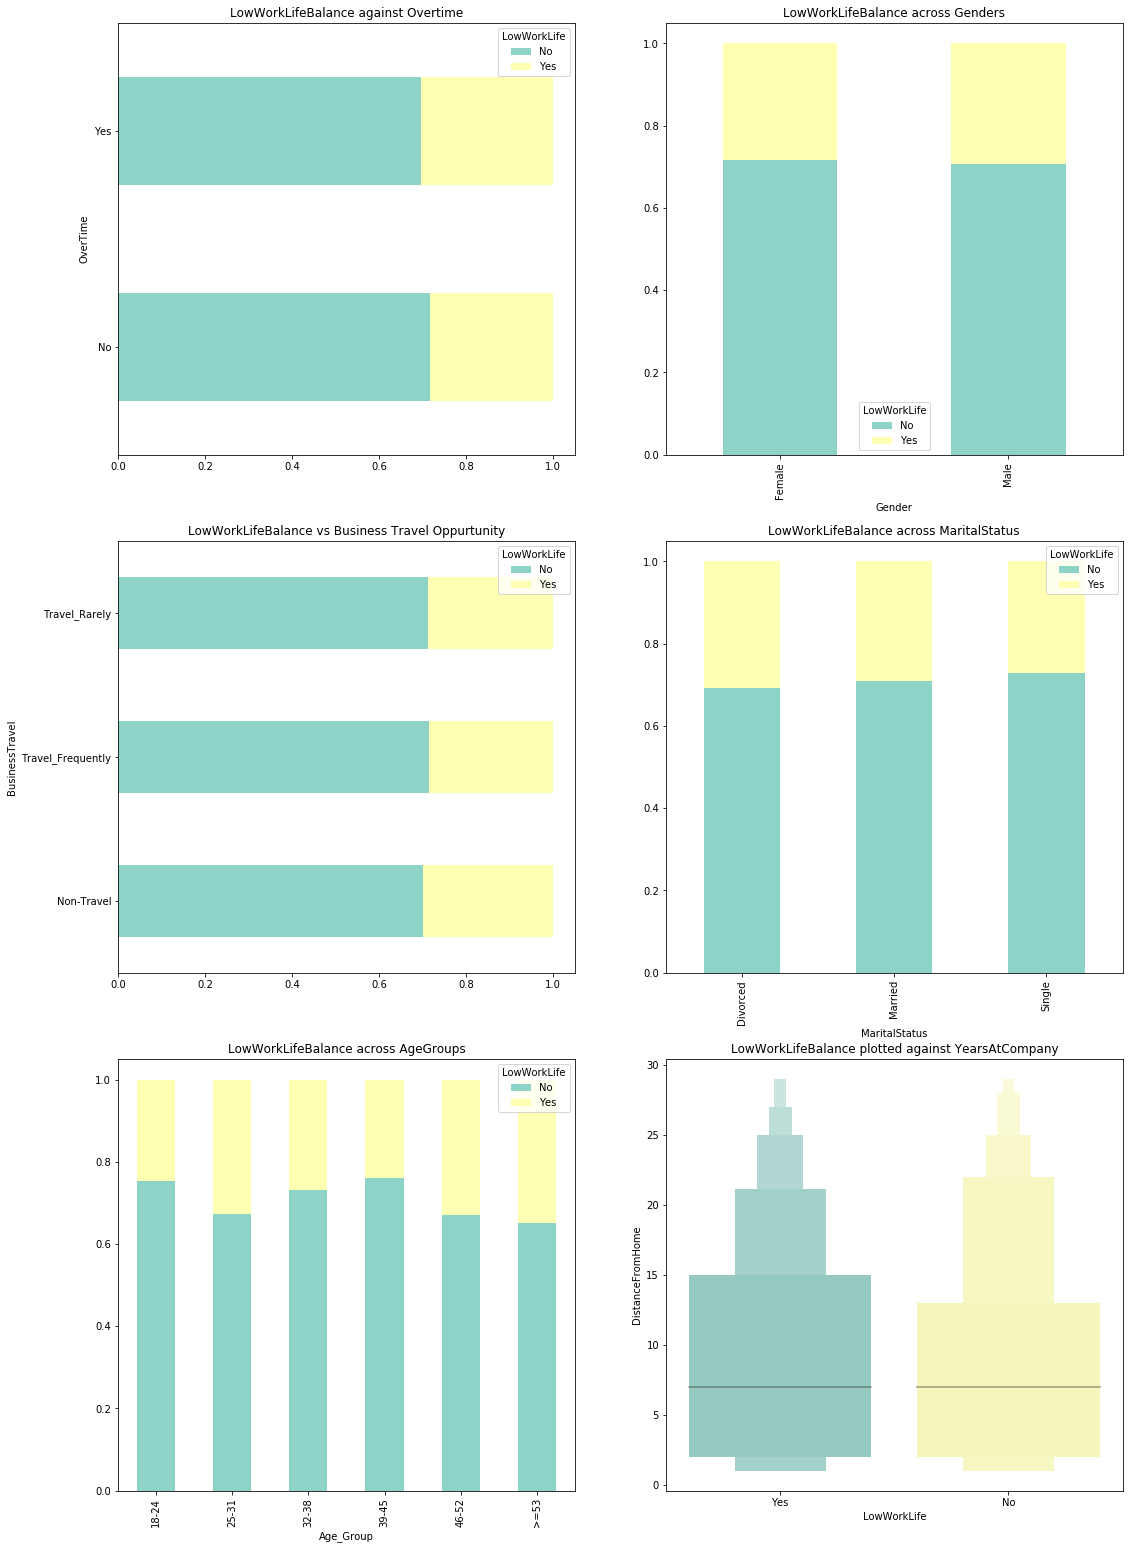

In [47]:
# WorkLifeBalance -> BusinessTravel, Gender, MaritalStatus, Overtime,DistanceFromHome,AgeGroup

myData["LowWorkLife"] = "No"
myData.loc[myData["WorkLifeBalance"] <= 2,"LowWorkLife"] = "Yes"
myDataVSovertime = pd.crosstab(index=myData["OverTime"],columns = myData["LowWorkLife"],normalize="index")
myDataVSgender = pd.crosstab(index=myData["Gender"],columns = myData["LowWorkLife"],normalize="index")
myDataVStravel = pd.crosstab(index=myData["BusinessTravel"],columns = myData["LowWorkLife"],normalize="index")
myDataVSmaritalstat = pd.crosstab(index=myData["MaritalStatus"],columns = myData["LowWorkLife"],normalize="index")
myDataVSageGroup = pd.crosstab(index=myData["Age_Group"],columns = myData["LowWorkLife"],normalize="index")
myDataVSattrition = pd.crosstab(index=myData["Attrition"],columns = myData["LowWorkLife"],normalize="index")

fig,ax = plt.subplots(3,2,figsize=(18,27))
myDataVSovertime.plot(kind='barh',stacked=True,ax=ax[0,0])
ax[0,0].set_title("LowWorkLifeBalance against Overtime")
myDataVSgender.plot(kind='bar',stacked=True,ax=ax[0,1])
ax[0,1].set_title("LowWorkLifeBalance across Genders")
myDataVStravel.plot(kind='barh',stacked=True,ax=ax[1,0])
ax[1,0].set_title("LowWorkLifeBalance vs Business Travel Oppurtunity")
myDataVSmaritalstat.plot(kind='bar',stacked=True,ax=ax[1,1])
ax[1,1].set_title("LowWorkLifeBalance across MaritalStatus")
myDataVSageGroup.plot(kind='bar',stacked=True,ax=ax[2,0])
ax[2,0].set_title("LowWorkLifeBalance across AgeGroups")
sns.boxenplot(x=myData["LowWorkLife"],y=myData["DistanceFromHome"],ax=ax[2,1])
ax[2,1].set_title("LowWorkLifeBalance plotted against YearsAtCompany")

plt.savefig("WorkLifeVSAttrition.png",bbox_inches = "tight",dpi=300)

#### Different Education Field , a reason ?
- This is to check,if employees who were trained for a required field, by education, do indeed pursue a work in that field or not ? And if not does it lead to eventually quitting the job for a different job ?
- For R&D department, Only 6% of employees claim to be from different educational background than required by the job.
- 57% of employees in HR and 64% of employees in Sales, were trained in a different educational stream than what is required by the Job.
- Off all the employees who belonged to this category only 18% of them left the job, this means that its not an important predictor for Attrition.

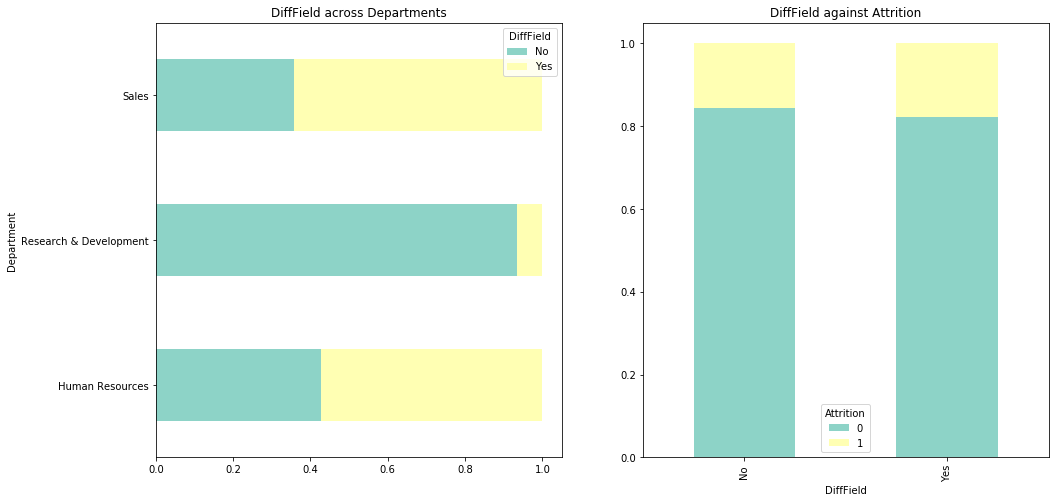

In [48]:
myData["DiffField"] = 'Yes'
myData.loc[(myData["EducationField"].isin(['Life Sciences','Medical','Technical Degree']) &
           (myData["Department"] == 'Research & Development')), "DiffField"] = 'No'
myData.loc[(myData["EducationField"].isin(["Marketing"]) & 
           (myData["Department"] == 'Sales')),"DiffField"] = 'No'
myData.loc[(myData["EducationField"].isin(["Human Resources"]) &
           (myData["Department"] == 'Human Resources')),"DiffField"] = 'No'
myDataVSattrition = pd.crosstab(index=myData["DiffField"],columns = myData["Attrition"],normalize="index")
myDataVSdept = pd.crosstab(index=myData["Department"],columns = myData["DiffField"],normalize="index")

fig,ax = plt.subplots(1,2,figsize=(16,8))
myDataVSdept.plot(kind='barh',stacked=True,ax=ax[0])
ax[0].set_title("DiffField across Departments")
myDataVSattrition.plot(kind='bar',stacked=True,ax=ax[1])
ax[1].set_title("DiffField against Attrition")

plt.savefig("DiffEduFieldVSAttrition.png",bbox_inches = "tight",dpi=300)

#### Overtime for Employees staying Far , a reason ?
- This is to check, if employees who stay farther than the Average Work to Home distance and who are asked to work OverTime, are more prone to leave the job.
- Off all the employees, who belong to this category 36% of them left the job, whereas Off all those who didn't belong to this category, only 13% of them quit the job. 
- This is an important variable which can contribute to the Attrition.


Attrition            0         1
OverTime&Far                    
No            0.863706  0.136294
Yes           0.640244  0.359756


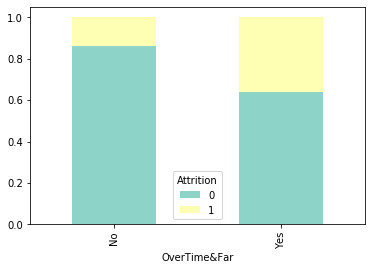

In [49]:
myData["OverTime&Far"] = "No"
myData.loc[(myData["OverTime"] == 'Yes') & (myData["DistanceFromHome"] >= np.mean(myData["DistanceFromHome"])),
           "OverTime&Far"] = 'Yes'
myDataVSattrition = pd.crosstab(columns=myData["Attrition"],index = myData["OverTime&Far"],normalize="index")
myDataVSattrition.plot(kind='bar',stacked=True)
print(myDataVSattrition)

plt.savefig("OverTimeVSAttrition.png",bbox_inches = "tight",dpi=300)

### Other Interesting Insights

#### Preferred Education Field among Genders
- There is no special gender preferences to any Education Field, as can be concluded from the data

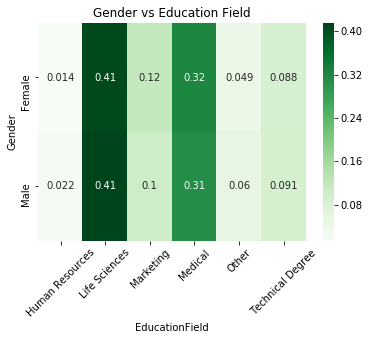

In [50]:
genderVSeducation = pd.crosstab(index=tot_employee["Gender"],columns=tot_employee["EducationField"],
                                normalize= "index")

ax = sns.heatmap(genderVSeducation, cmap="Greens",annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Gender vs Education Field")
plt.xticks(rotation=45)
plt.savefig("GenderVSEducation.png",bbox_inches='tight',dpi=300)

#### EducationField with Highest Annual Income
- Median Salary for the employees, with Marketing as Education Field, is the highest among all.  

- Whereas employees with HR as their education field have the lowest Median Salary amongst all.

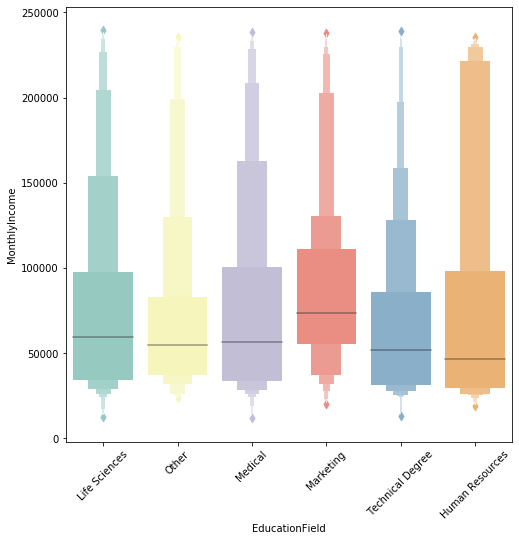

In [51]:
fig = plt.figure(figsize=(8,8))
sns.boxenplot(x=tot_employee["EducationField"],y=tot_employee["MonthlyIncome"]*12)
plt.xticks(rotation=45)

plt.savefig("EduFieldVSIncome.png",bbox_inches = "tight",dpi=300)

#### Work , a reason for Divorce ?
- To Answer the question, we need to see factors which might have an impact on marriage life like Business Travel, WorkLife Balance, EnvironmentSatisfaction, Job Satisfaction.
- From the below graphs, no significant difference can be observed by analyzing the above parameters.

In [56]:
myData["Divorce"] = "No"
myData["Divorce"].loc[myData["MaritalStatus"] == "Divorced"] = "Yes"
divorceVStravel= pd.crosstab(columns=myData["Divorce"],index=myData["BusinessTravel"],normalize="index")
divorceVSworklifebal= pd.crosstab(columns=myData["Divorce"],index=myData["WorkLifeBalance"],normalize="index")
divorceVSenvsat = pd.crosstab(columns=myData["Divorce"],index=myData["EnvironmentSatisfaction"],normalize="index")
divorceVSjobsat = pd.crosstab(columns=myData["Divorce"],index=myData["JobSatisfaction"],normalize="index")

fig,ax = plt.subplots(2,2,figsize=(21,21))
divorceVStravel.plot(kind='barh',stacked=True,ax=ax[0,0])
ax[0,0].set_title("Divorce vs Travel")
divorceVSworklifebal.plot(kind='bar',stacked=True,ax=ax[0,1])
ax[0,1].set_title("Divorce vs WorkLifeBalance")
divorceVSenvsat.plot(kind='bar',stacked=True,ax=ax[1,0])
ax[1,0].set_title("Divorce vs EnvironmentSatisfaction")
divorceVSjobsat.plot(kind='bar',stacked=True,ax=ax[1,1])
ax[1,1].set_title("Divorce vs JobSatisfaction")

plt.savefig("DivorceInsights.png",bbox_inches = "tight",dpi=300)

KeyError: 'MaritalStatus'

#### Work2Home distance depends on Marital Status or Income ?
- From the analysis, it can be seen that 75 percentile of Singles stay within 12km from work, compared to 15km for Married and 13km for Divorced Employees.
- Most of the employees, who earn within 10000 USD prefer to stay within 10km from work, but also,Most of the employees who stay farther also earn below 10000 USD.
- It can be concluded that Marital Status is a slightly better predictor for Distance from Work to Home of employees.

Correlation between Distance and Income :
                   DistanceFromHome  MonthlyIncome
DistanceFromHome          1.000000      -0.017014
MonthlyIncome            -0.017014       1.000000


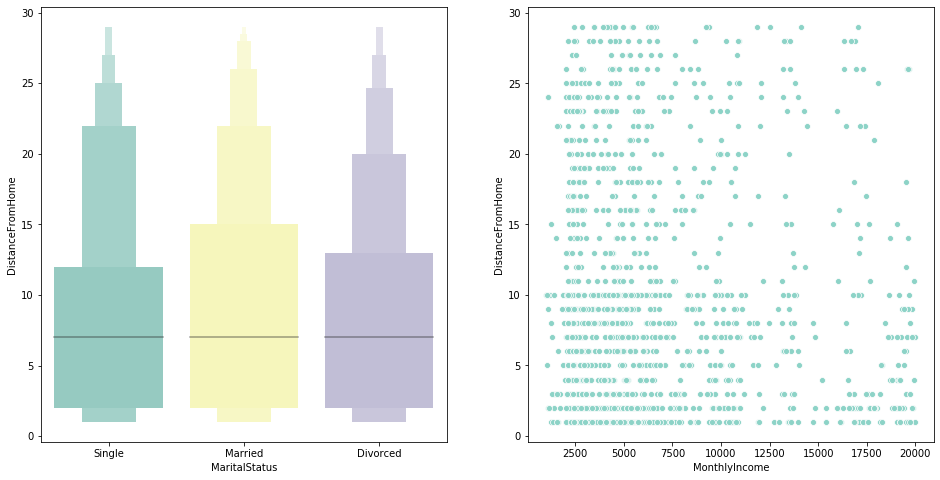

In [53]:
data = tot_employee[["DistanceFromHome","MonthlyIncome"]]
print("Correlation between Distance and Income :\n",data.corr())

fig,ax = plt.subplots(1,2, figsize=(16,8))
sns.boxenplot(x=tot_employee["MaritalStatus"],y=tot_employee["DistanceFromHome"],ax=ax[0])
sns.scatterplot(data= tot_employee, x="MonthlyIncome",y="DistanceFromHome",ax=ax[1])

plt.savefig("Work2HomeDistInsights.png",bbox_inches = "tight",dpi=300)

### Hypothesis Testing :
Following are the 5 variables which we believe will be good predictors of Attrition: 
1. Job Satisfaction 
2. Work Life Balance
3. Overtime
4. Age
5. Department

#### Job Satisfaction


In [54]:
myData = data.copy(deep= True)
myData["LowJobSat"] = "No"
myData.loc[myData["JobSatisfaction"] <= 2,"LowJobSat"] = "Yes"
myDataVSattrition = pd.crosstab(index=myData["Attrition"],columns = myData["LowJobSat"],normalize='index')

ax = sns.heatmap(myDataVSattrition*100, cmap="Greens",annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("% of Total Employees with Low Job Satisfaction")
plt.savefig("LowJobSatVSAttrition.png",bbox_inches='tight',dpi=300)

KeyError: 'JobSatisfaction'

#### Work Life Balance

In [ ]:
myData["LowWLB"] = "No"
myData.loc[myData["EnvironmentSatisfaction"] <= 2,"LowWLB"] = "Yes"
myDataVSattrition = pd.crosstab(index=myData["Attrition"],columns = myData["LowWLB"],normalize='index')

ax = sns.heatmap(myDataVSattrition*100, cmap="Greens",annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("% of Total Employees with Low Work Life Balance")
plt.savefig("LowWLB.png",bbox_inches='tight',dpi=300)

#### Overtime

In [ ]:
myDataVSattrition = pd.crosstab(index=myData["Attrition"],columns = myData["OverTime"],normalize='index')

ax = sns.heatmap(myDataVSattrition*100, cmap="Greens",annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Overtime vs Attrition")
plt.savefig("OvertimeVSAttrition.png",bbox_inches='tight',dpi=300)

#### Age

In [ ]:
myData = copy_data.copy(deep=True)
myDataVSattrition = pd.crosstab(index=myData["Attrition"],columns = myData["Age_Group"],normalize='columns')

ax = sns.heatmap(myDataVSattrition*100, cmap="Greens",annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Age groups of Employees vs Attrition")
plt.savefig("AgeVSAttrition.png",bbox_inches='tight',dpi=300)

#### Department

In [ ]:
myDataVSattrition = pd.crosstab(index=myData["Attrition"],columns = myData["Department"],normalize='columns')

ax = sns.heatmap(myDataVSattrition*100, cmap="Greens",annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Department of Employees vs Attrition")
plt.xticks(rotation=45)
plt.savefig("DepartmentVSAttrition.png",bbox_inches='tight',dpi=300)

In [ ]:
myDataVSattrition = pd.crosstab(index=myData["Attrition"],columns = myData["JobLevel"],normalize='columns')

ax = sns.heatmap(myDataVSattrition*100, cmap="Greens",annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Job Level vs Attrition")
plt.savefig("JobLevelVSAttrition.png",bbox_inches='tight',dpi=300)